# rdpg_corr function

In [1]:
import numpy as np
from rdpg_corr import rdpg_corr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(1234)
X = np.random.dirichlet([20, 20], size=100)
Y = None
rdpg_corr(X,Y,0.3, rescale=False, directed=False, loops=False)

(array([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [1., 1., 0., ..., 0., 1., 0.],
        [1., 1., 1., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), array([[0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 1., 0., ..., 1., 1., 0.]]))

# property: correlation

In [3]:
import numpy as np
import copy
import warnings

In [4]:
def test_rdpg_corr_rho(X,Y,r):
    g1, g2 = rdpg_corr(X,Y,r, rescale=False, directed=False, loops=False)
    g1 = g1[np.where(~np.eye(g1.shape[0], dtype=bool))]
    g2 = g2[np.where(~np.eye(g2.shape[0], dtype=bool))]
    correlation = np.corrcoef(g1, g2)[0,1]
    return correlation
   
def density_rdpg_corr_rho(X,Y,r, pairs):
    folder2 = []
    h = 0
    correlation = 0
    for i in range (pairs):
        correlation = test_rdpg_corr_rho(X,Y,r)
        folder2.append(correlation)
        h += correlation
    
    folder2.sort()
    avr = h/pairs
    return avr

In [5]:
density_rdpg_corr_rho(X,Y,-0.65, 300)

-0.6485313972509921

In [6]:
density_rdpg_corr_rho(X,Y,-0.5, 300)

-0.4990558242302554

In [7]:
density_rdpg_corr_rho(X,Y,-0.3, 300)

-0.2988490346233203

In [8]:
density_rdpg_corr_rho(X,Y,-0.1, 300)

-0.09870083777719571

In [10]:
density_rdpg_corr_rho(X,Y,0.0, 300)

0.0013585567716115814

In [11]:
density_rdpg_corr_rho(X,Y,0.1, 300)

0.10058893995688324

In [12]:
density_rdpg_corr_rho(X,Y,0.3, 300)

0.2991454208697318

In [13]:
density_rdpg_corr_rho(X,Y,0.5, 300)

0.49898674661125275

In [14]:
density_rdpg_corr_rho(X,Y,0.7, 300)

0.7004703681923954

In [15]:
density_rdpg_corr_rho(X,Y,0.99, 300)

0.989801779869212

In [16]:
X = np.random.dirichlet([30, 30], size=200)
Y = None
r = 0.3
density_rdpg_corr_rho(X,Y,r, 300)

0.3000549676335675

In [17]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/mac/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5, 1.0, 'Contrast between expected and calculated rho')

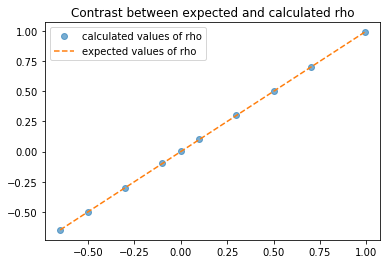

In [19]:
x_list = [-.65,-.5,-.3,-.1,0,.1,.3,.5,.7,.99]
y1 = [-0.648394,-0.499,-0.300,-0.097989,0.00067,
      0.1005,0.299837,0.500475,0.7003557,0.99]
l1, = plt.plot(x_list,y1,'o',label='calculated values of rho',alpha=0.6)
l2, = plt.plot(x_list,x_list, linestyle='--',label='expected values of rho')
plt.legend(loc='upper left')
plt.title('Contrast between expected and calculated rho')

In [20]:
def calculate_corr_er(A1, A2):
    return np.corrcoef(A1.ravel(), A2.ravel())[0, 1]

In [21]:
def corrplot(corrs, rho, title=None):
    if title is None:
        title = f"Expected correlation = {rho:0.2f}"
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.distplot(corrs, ax=ax)
    ax.axvline(rho, c="green", label="Expected")
    ax.axvline(corrs.mean(), c="red", label="Empirical")
    ax.set_xlabel("Correlation")
    ax.legend()
    ax.set_title(title)
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])

Text(0, 0.5, 'Empirical correlation')

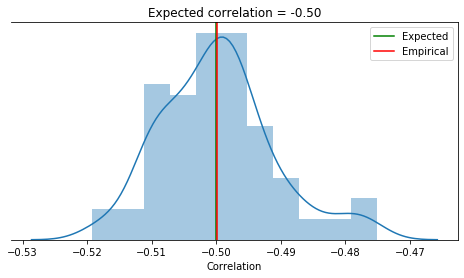

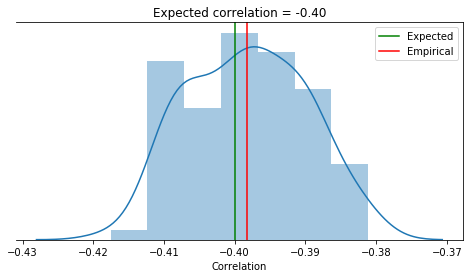

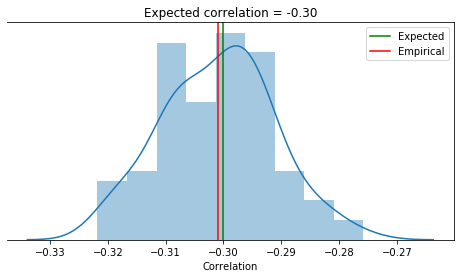

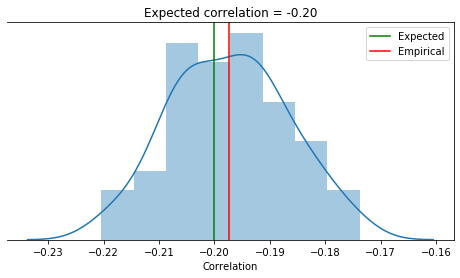

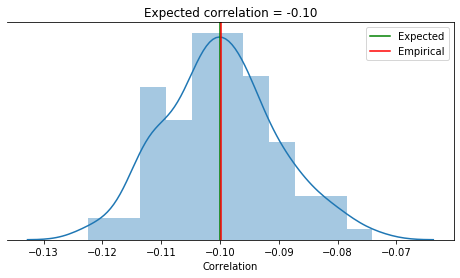

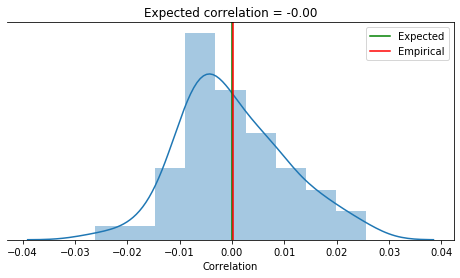

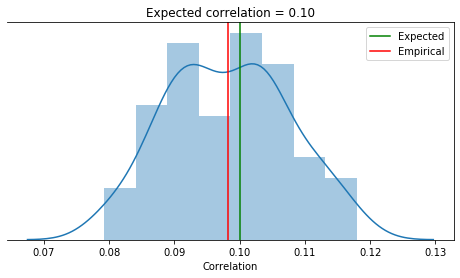

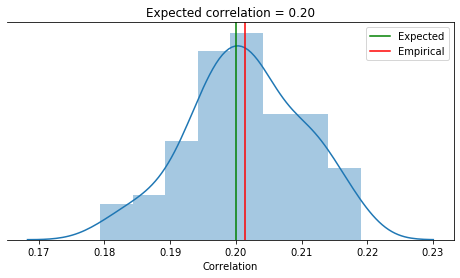

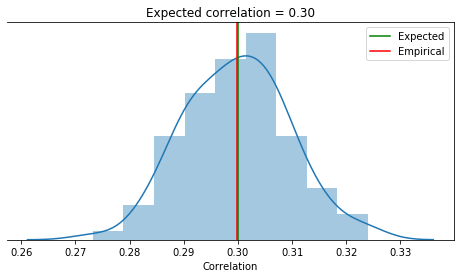

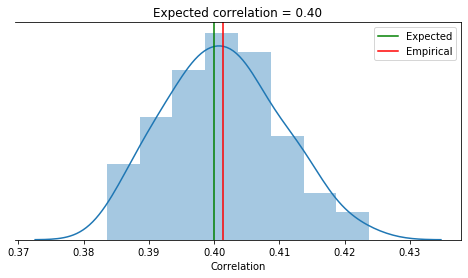

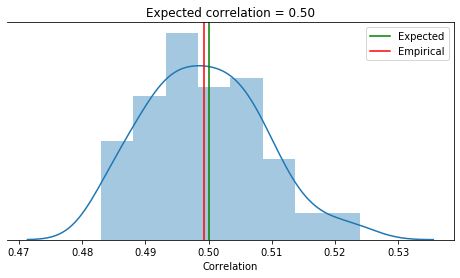

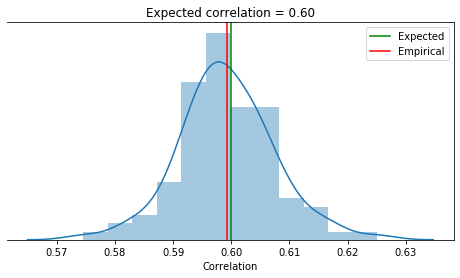

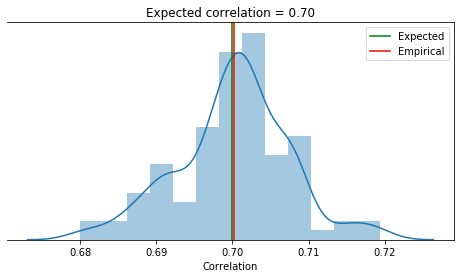

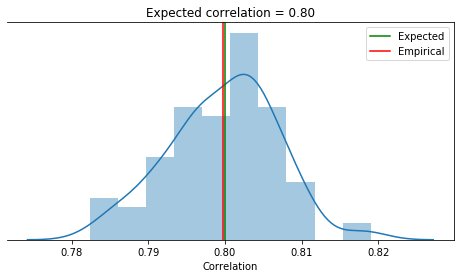

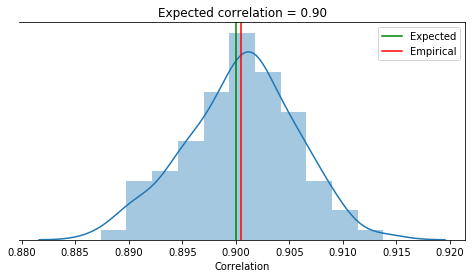

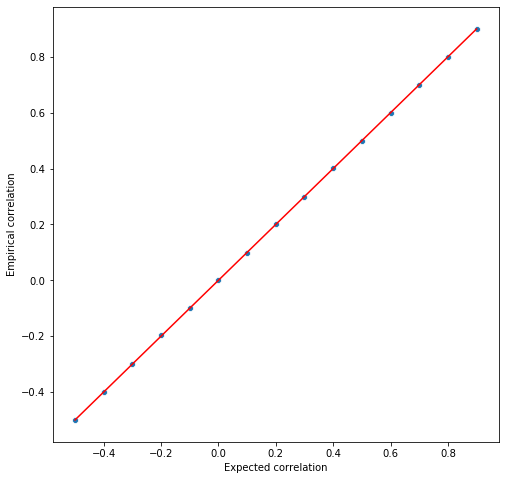

In [22]:
n_sims = 100
X = np.random.dirichlet([20, 20], size=100)
rhos = np.linspace(-0.5, 0.9, 15)
mean_corrs = np.empty(len(rhos))
all_corrs = []
for i, rho in enumerate(rhos):
    corrs = np.empty(n_sims)
    for j in range(n_sims):
        A1, A2 = rdpg_corr(X,None,rho, rescale=False, directed=True, loops=True)
        corrs[j] = calculate_corr_er(A1, A2)

    corrplot(corrs, rho)

    mean_corrs[i] = corrs.mean()
    all_corrs.append(corrs)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(rhos, mean_corrs, ax=ax)
sns.lineplot(rhos, rhos, ax=ax, color="red")
ax.set_xlabel("Expected correlation")
ax.set_ylabel("Empirical correlation")

Text(0.5, 1.0, 'Correlation for rho-RDPG')

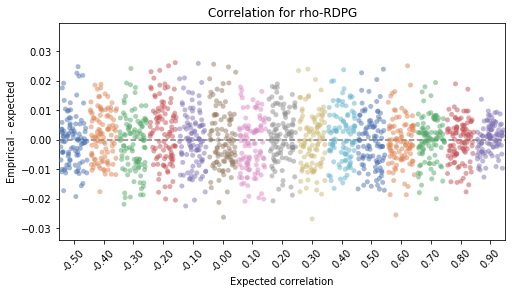

In [23]:
dfs = []
for i, corrs in enumerate(all_corrs):
    temp_df = pd.DataFrame()
    ecorr = rhos[i]
    temp_df["Empirical - expected"] = corrs - ecorr
    temp_df["Expected correlation"] = ecorr
    dfs.append(temp_df)
corr_df = pd.concat(dfs, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.stripplot(
    data=corr_df,
    x="Expected correlation",
    y="Empirical - expected",
    ax=ax,
    alpha=0.5,
    jitter=0.45,
    palette="deep",
)
plt.xticks(rotation=45)
ticklabels = np.vectorize(lambda x: f"{x:0.2f}")(rhos)
ax.xaxis.set_major_formatter(plt.FixedFormatter(ticklabels))
ax.axhline(0, color="grey", linestyle="--", alpha=1)
ax.set_title("Correlation for rho-RDPG")